In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
plt.rc('figure', autolayout = True)
plt.rc(
    'axes',
    labelweight = 'bold',
    labelsize = 'large',
    titleweight = 'bold',
    titlesize = 14,
    titlepad = 10,
    
)

In [3]:
df = pd.read_csv('Data Science Jobs Salaries.csv')
display(df.shape, df.head())

(245, 11)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021e,EN,FT,Data Science Consultant,54000,EUR,64369,DE,50,DE,L
1,2020,SE,FT,Data Scientist,60000,EUR,68428,GR,100,US,L
2,2021e,EX,FT,Head of Data Science,85000,USD,85000,RU,0,RU,M
3,2021e,EX,FT,Head of Data,230000,USD,230000,RU,50,RU,L
4,2021e,EN,FT,Machine Learning Engineer,125000,USD,125000,US,100,US,S


## UNDERSTANDING THE DATA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           245 non-null    object
 1   experience_level    245 non-null    object
 2   employment_type     245 non-null    object
 3   job_title           245 non-null    object
 4   salary              245 non-null    int64 
 5   salary_currency     245 non-null    object
 6   salary_in_usd       245 non-null    int64 
 7   employee_residence  245 non-null    object
 8   remote_ratio        245 non-null    int64 
 9   company_location    245 non-null    object
 10  company_size        245 non-null    object
dtypes: int64(3), object(8)
memory usage: 21.2+ KB


In [5]:
df.describe()

,salary,salary_in_usd,remote_ratio
count,2.450000e+02,245.000000,245.000000
mean,5.025418e+05,99868.012245,69.183673
std,2.276230e+06,83983.326949,37.593421
min,4.000000e+03,2876.000000,0.000000
25%,6.000000e+04,45896.000000,50.000000
50%,1.030000e+05,81000.000000,100.000000
75%,1.740000e+05,130000.000000,100.000000
max,3.040000e+07,600000.000000,100.000000


In [6]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [7]:
df.dtypes

work_year             object
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [8]:
t = pd.pivot_table(data = df, values= 'salary_in_usd', 
                   columns= 'experience_level', 
                   index = 'job_title', aggfunc=np.median)
t

experience_level,EN,EX,MI,SE
job_title,,,,
3D Computer Vision Researcher,NaN,NaN,5423.0,NaN
AI Scientist,15051.0,NaN,NaN,55000.0
Applied Data Scientist,NaN,NaN,54376.0,NaN
Applied Machine Learning Scientist,NaN,NaN,423000.0,NaN
BI Data Analyst,9272.0,150000.0,98000.0,NaN
Big Data Architect,NaN,NaN,NaN,99956.0
Big Data Engineer,11084.5,NaN,20335.5,111535.5
Business Data Analyst,79800.5,NaN,135000.0,NaN
Cloud Data Engineer,NaN,NaN,89514.0,160000.0


## MEAN SALARY OF EACH EXPERIENCE LEVEL

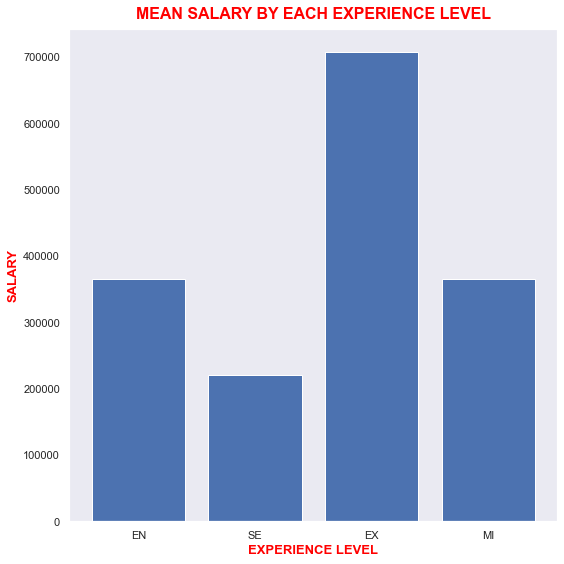

In [9]:
arr = np.array(df.groupby('experience_level').salary.mean())

exp_level = np.array(['EN', 'SE', 'EX', 'MI'])

fig, ax = plt.subplots()

ax.bar(exp_level, arr)
ax.set_title('MEAN SALARY BY EACH EXPERIENCE LEVEL', fontdict = {'size': 16, 'color' : 'red'})
ax.set_xlabel('EXPERIENCE LEVEL', fontdict = {'size': 13, 'color': 'red'})
ax.set_ylabel('SALARY', fontdict = {'size': 13, 'color': 'red'})
ax.grid()

fig.set_size_inches(8,8)
plt.show()



In [10]:
#insight:
#In above plot we can know what is the avearge salary is being paid to by expereince level of employees.
#We can see that EX (Executives) are having highest mean salary

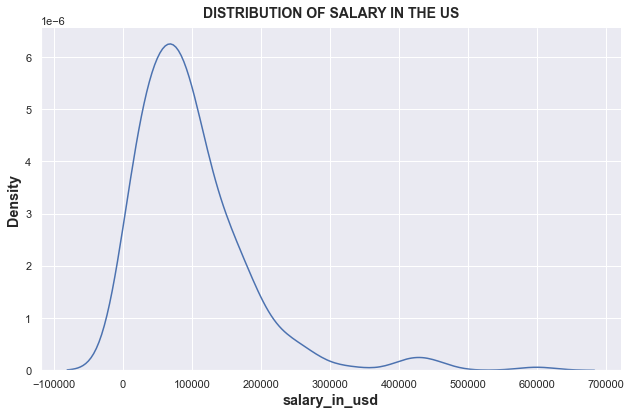

In [11]:
g = sns.displot(data = df, x = 'salary_in_usd', kind = 'kde')
plt.title('DISTRIBUTION OF SALARY IN THE US')
g.fig.set_figwidth(10)
g.fig.set_figheight(6)


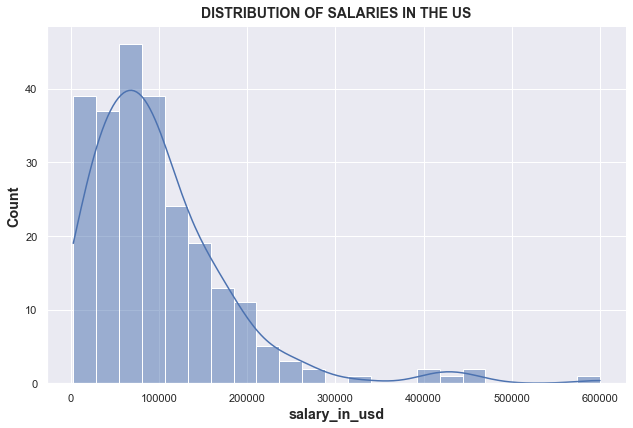

In [12]:
g = sns.displot(data = df, x = 'salary_in_usd', kde = True)
plt.title('DISTRIBUTION OF SALARIES IN THE US')
g.fig.set_figwidth(10)
g.fig.set_figheight(6)

In [13]:
#Insight
#Above distritbution plots show us how salaries in USD is dstributed from lowest to highest salaries.
#As you can see there is only a salary which as high as 600k while most of them is around 80-90k.

## EXPERIENCE VS REMOTE RATIO

In [14]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [15]:
df['remote_ratio'].unique()

array([ 50, 100,   0], dtype=int64)

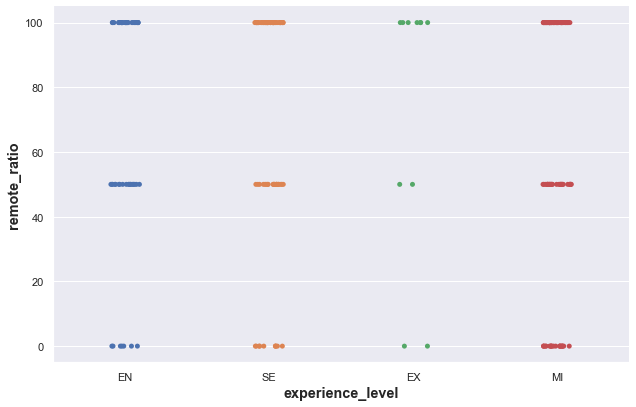

In [16]:
g = sns.catplot(x = 'experience_level', y = 'remote_ratio', data = df)
g.fig.set_figwidth(10)
g.fig.set_figheight(6)

## SALARY IN USD FOR EACH EMPLOYMENT TYPE

In [17]:
df.employment_type.unique()

array(['FT', 'PT', 'CT', 'FL'], dtype=object)

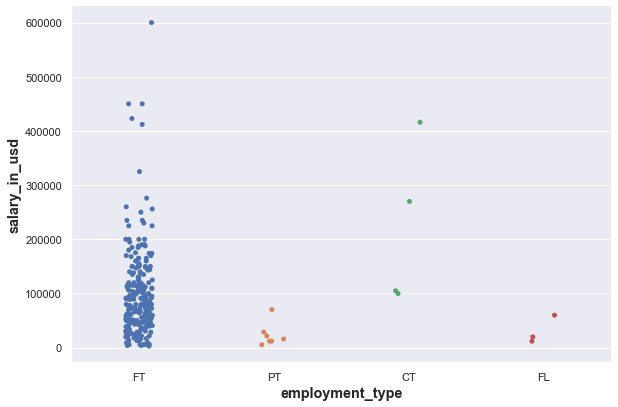

In [18]:
g = sns.catplot(x = 'employment_type', y = 'salary_in_usd', data = df)
g.fig.set_figwidth(10)
g.fig.set_figheight(6)

## SALARY IN USD FOR EACH EXPERIENCE LEVEL

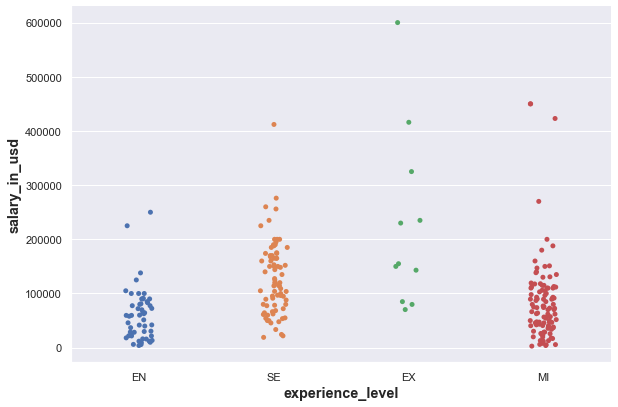

In [19]:
g = sns.catplot(x ='experience_level', y = 'salary_in_usd', data = df)
g.fig.set_figwidth(10)
g.fig.set_figheight(6)

In [20]:
df['employee_residence'].nunique()

45

## TOP 5 EMPLOYEES RESIDENCE WITH HIGHEST SALARY

In [21]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

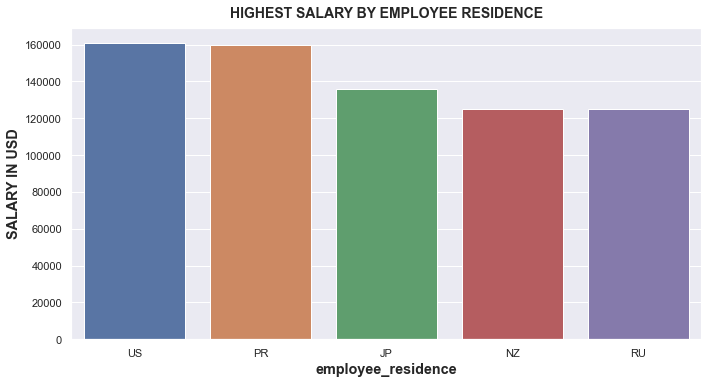

In [22]:
res = df.groupby('employee_residence')['salary_in_usd'].mean().sort_values(ascending = False)
res = res.head()

plt.figure(figsize = (10, 5.5))
sns.barplot(x = res.index, y = res.values)
plt.title('HIGHEST SALARY BY EMPLOYEE RESIDENCE')
plt.ylabel('SALARY IN USD')
plt.show()

## LAST 5 EMPLOYEES WITH LEAST SALARY PAID

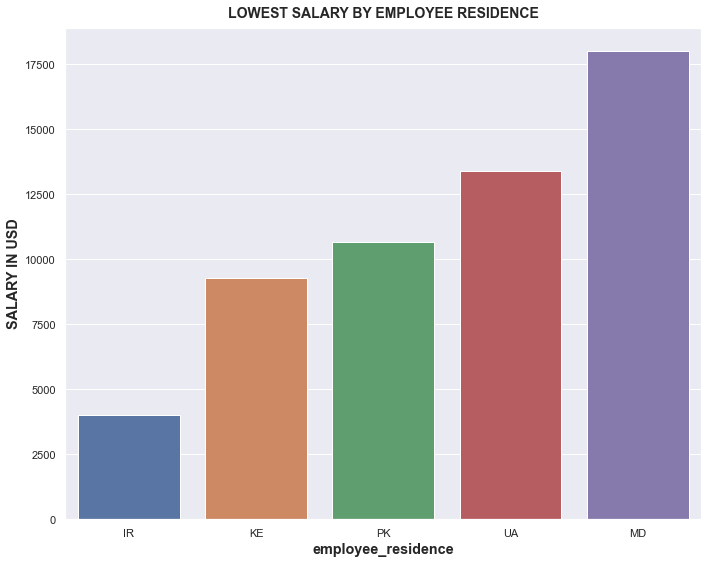

In [23]:
res1 = df.groupby('employee_residence')['salary_in_usd'].mean().sort_values(ascending = True)
res1 = res1.head()

plt.figure(figsize=(10,8))
sns.barplot(x = res1.index, y = res1.values)
plt.title('LOWEST SALARY BY EMPLOYEE RESIDENCE')
plt.ylabel('SALARY IN USD')
plt.show()

## SALARY PAID BY COMPANY SIZE

In [24]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [25]:
df.company_size.unique()

array(['L', 'M', 'S'], dtype=object)

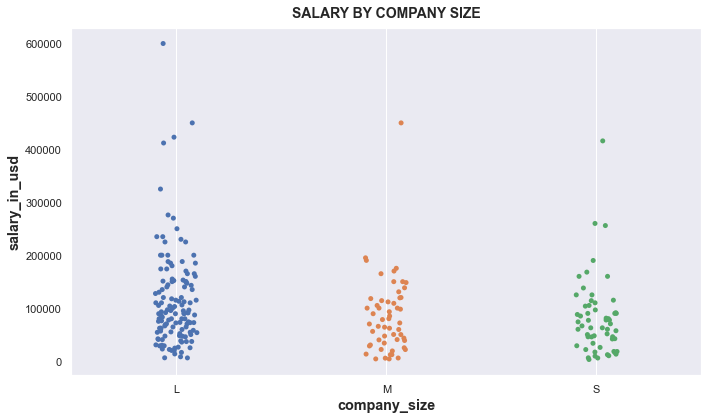

In [26]:
plt.figure(figsize=(10,6))
sns.stripplot(x ='company_size', y = 'salary_in_usd', data = df).set_title('SALARY BY COMPANY SIZE')
plt.grid()

## SALARY PAID AT EACH REMOTE PLACE

Text(0.5, 1.0, 'SALARY BY REMOTE RATIO')

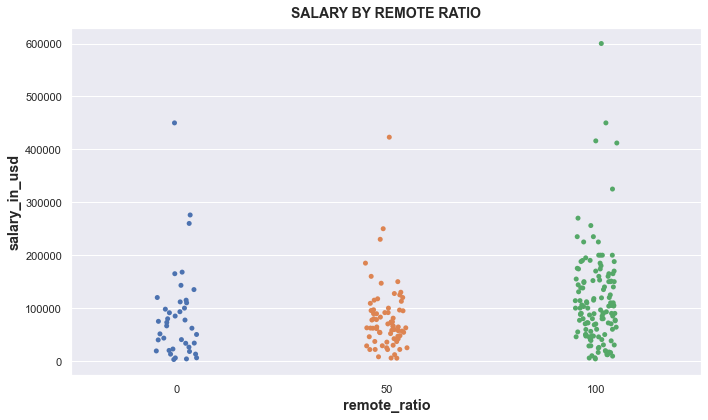

In [27]:
plt.figure(figsize = (10,6))
sns.stripplot(x = 'remote_ratio', y = 'salary_in_usd', data = df).set_title('SALARY BY REMOTE RATIO')

In [28]:
#INSIGHT
#What is the distribution of salaries by remote ration? this plot shows exactly the same
#We can learn that there more employees working 100% remote than full office or partial WFH.

In [29]:
t2 = pd.pivot_table(data = df, 
                    values = 'salary_in_usd', 
                    columns = 'company_size', 
                    index = 'remote_ratio', 
                    aggfunc=np.max)
t2

company_size,L,M,S
remote_ratio,,,
0,276000,450000,260000
50,423000,109024,160000
100,600000,195000,416000


In [30]:
# Here we can see that at large and small comany 100% remote workers are getting paid 
#higher than workers with 0% remote ration. 
#it is possible because senior managers are wokring remote than juniors.

## NUMBER OF EMPLOYEE BY YEAR OF JOINING

Text(0.5, 1.0, 'NUMBER OF EMPLOYEES BY YEAR OF JOINING')

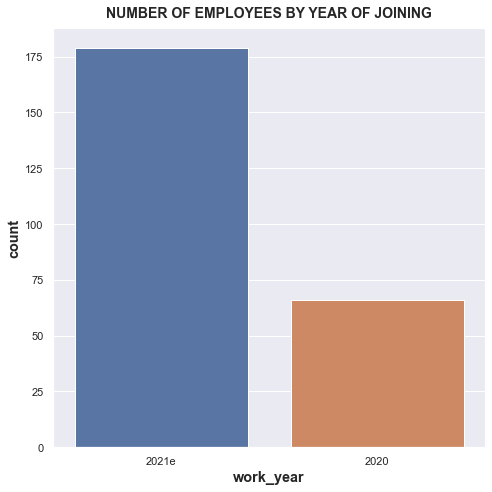

In [31]:
plt.figure(figsize = (7,7))
sns.countplot(x = 'work_year', data = df).set_title('NUMBER OF EMPLOYEES BY YEAR OF JOINING')


In [32]:
df['work_year'].value_counts()

2021e    179
2020      66
Name: work_year, dtype: int64

In [33]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

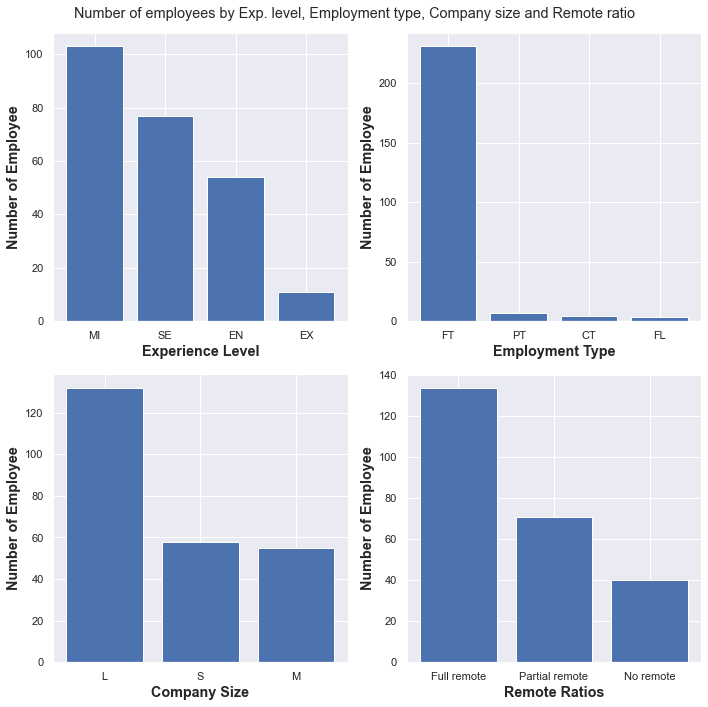

In [37]:
columns = ['experience_level', 'employment_type', 'company_size']

ex = df['experience_level'].value_counts()
em = df['employment_type'].value_counts()
co = df['company_size'].value_counts()
re = df['remote_ratio'].map({100: 'Full remote', 50: 'Partial remote', 0: 'No remote'}).value_counts()

fig, axs = plt.subplots(2,2, figsize =(10,10))

axs[0,0].bar(ex.index, ex.values)
axs[0,0].set_xlabel('Experience Level')
axs[0,0].set_ylabel('Number of Employee')

axs[0,1].bar(em.index, em.values)
axs[0,1].set_xlabel('Employment Type')
axs[0,1].set_ylabel('Number of Employee')

axs[1,0].bar(co.index, co.values)
axs[1,0].set_xlabel('Company Size')
axs[1,0].set_ylabel('Number of Employee')

axs[1,1].bar(re.index, re.values)
axs[1,1].set_xlabel('Remote Ratios')
axs[1,1].set_ylabel('Number of Employee')

plt.suptitle('Number of employees by Exp. level, Employment type, Company size and Remote ratio')
fig.tight_layout()
plt.show


In [38]:
#If you see by expereince level medium experienced employees are most hired in data science industry.

#Majority of jobs are full time in data science industry.

#Large companies hire more data scientists than medium and smaller ones.

#As we have seen, majority of emplyees are wokring remotly.

In [43]:
df['company_location'].value_counts().reset_index().set_index('index').head()

,company_location
index,
US,108
DE,19
IN,17
GB,16
FR,11


## TOP 5 COUNTRIES BY WHICH EMPLOYEES ARE EMPLOYED

<function matplotlib.pyplot.show(close=None, block=None)>

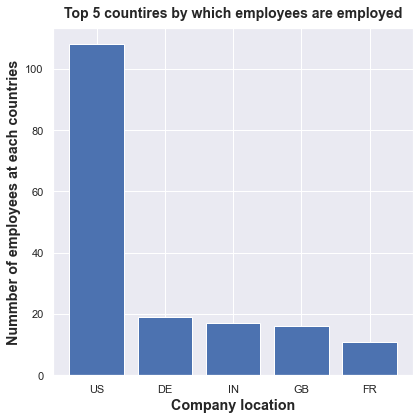

In [47]:
cl = df['company_location'].value_counts().reset_index().set_index('index').head()

plt.figure(figsize = (6,6))

plt.bar(np.array(cl.index), np.array(cl.values).reshape(-1))
plt.ylabel('Nummber of employees at each countries')
plt.xlabel('Company location')
plt.title('Top 5 countires by which employees are employed')
plt.show

In [49]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


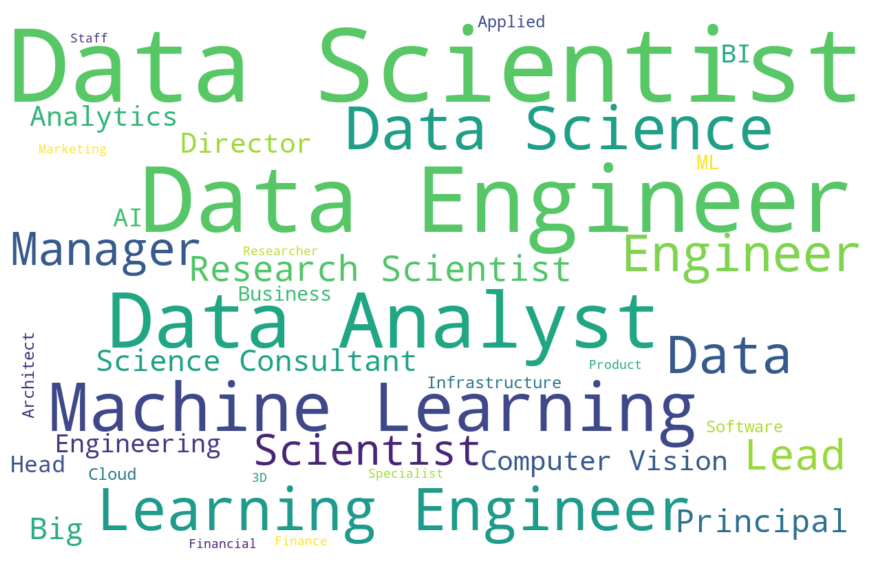

In [53]:
from wordcloud import WordCloud, STOPWORDS


fig = plt.gcf()
fig.set_size_inches(15,8)
wc = WordCloud(stopwords=STOPWORDS,
              background_color='white',
              contour_width=3,
              contour_color='red',
              width=1250,
              height=800,
              max_words=250,
              max_font_size=250,
              random_state=42
              )

wc.generate(' '.join(df['job_title']))
fig= plt.imshow(wc, interpolation= "bilinear")
fig= plt.axis('off')


In [54]:
df.groupby(['company_location'])['employee_residence'].value_counts().

company_location  employee_residence
AE                AE                    1
AS                IN                    1
AT                AT                    2
                  DE                    1
BE                BE                    1
                                       ..
US                PR                    1
                  PT                    1
                  RO                    1
                  RU                    1
VN                VN                    1
Name: employee_residence, Length: 71, dtype: int64